In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv('homeprice1.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [4]:
df['bedrooms'].median()

4.0

In [5]:
df['bedrooms']=df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


/Users/rishijaiswal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/rishijaiswal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/rishijaiswal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


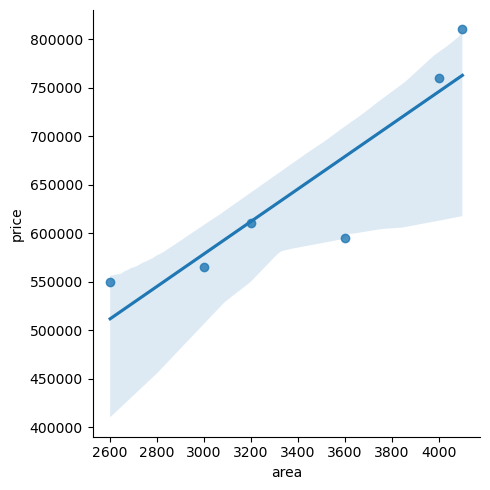

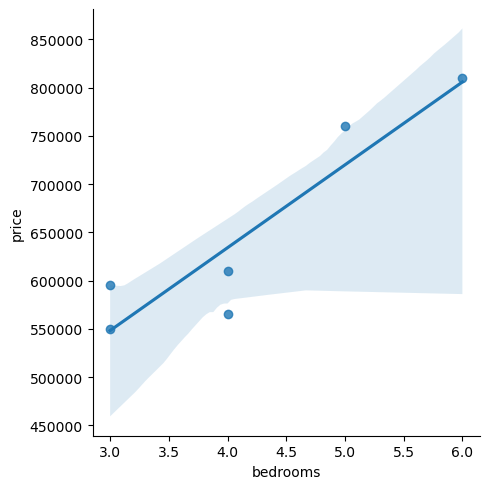

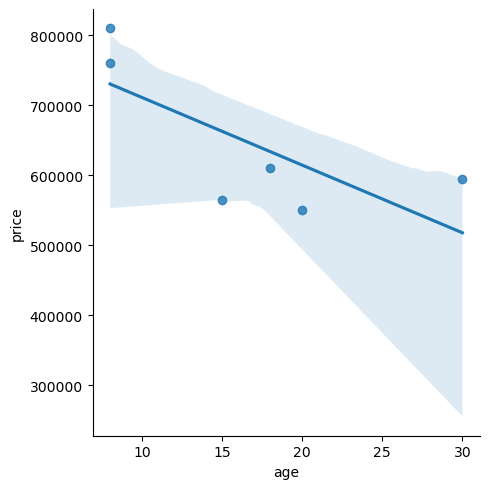

In [6]:
import seaborn as sns
sns.lmplot(x='area',y='price',data=df)
sns.lmplot(x='bedrooms',y='price',data=df)
sns.lmplot(x='age',y='price',data=df)

In [7]:
reg = LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [8]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [9]:
reg.intercept_

221323.00186540402

In [10]:
reg.predict([[3000,3,40]])

/Users/rishijaiswal/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [11]:
reg.coef_[0]*3000+reg.coef_[1]*3+reg.coef_[2]*40+reg.intercept_


498408.25158030697

# Find price of home with 2500sqr ft area, 4 bedrooms, 5 year old


In [12]:
from sklearn.metrics import r2_score
y_original=df.price
y_predicted=reg.predict(df[['area','bedrooms','age']])
r_square=r2_score(y_original,y_predicted)
print('model accuracy is',r_square*100)

model accuracy is 95.50196399325817


In [13]:
import pickle

In [14]:
with open('model_pickle','rb') as file:
    mp=pickle.load(file)

In [15]:
x=df.area.values.reshape(-1,1)

In [16]:
mp.predict(x)

array([544324.32432432, 594729.72972973, 619932.43243243, 670337.83783784,
       720743.24324324, 733344.59459459])